# Project Name: Heart Attack Prediction Using Machine Learning Approaches

### Let us import the necessary liabraries and read our DataSet

In [56]:
# Imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Imports dataset
df= pd.read_csv(r"E:\Adv Analytics\Datasets\heart.csv")

In [3]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Shape of dataframe
df.shape

(303, 14)

In [7]:
# Concise summery of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Statistics of dataframe
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Pairwise correlation of all columns in dataframe
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [10]:
# Checking for duplicates
df.duplicated().sum()

1

In [11]:
# View duplicate
df.loc[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
df.loc[163:164]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
# Drops duplicates
df= df.drop_duplicates()

In [14]:
# Sets the indices in order
df= df.reset_index(drop=True)

In [15]:
df.loc[163:164]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


# Exploratory Data Analysis

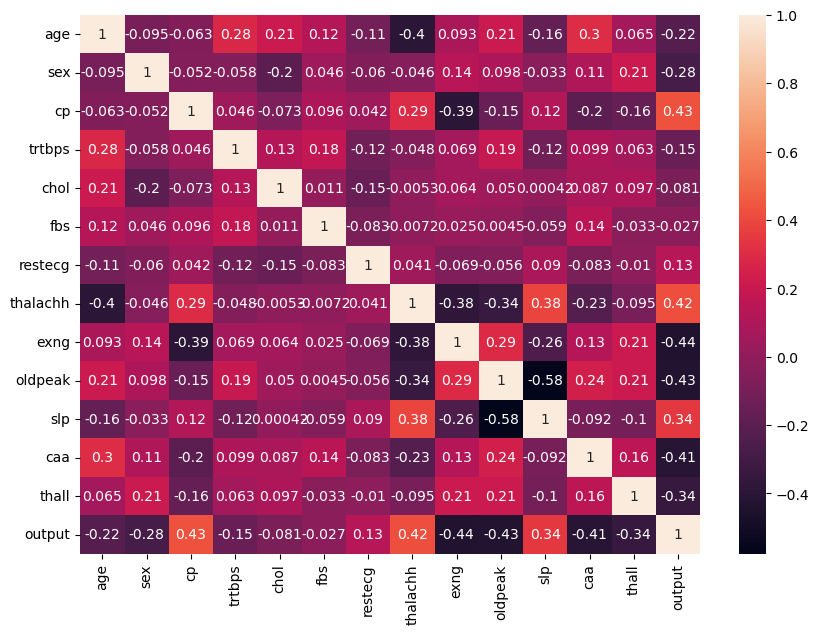

In [18]:
# Heatmap of the correlation
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)
plt.show()

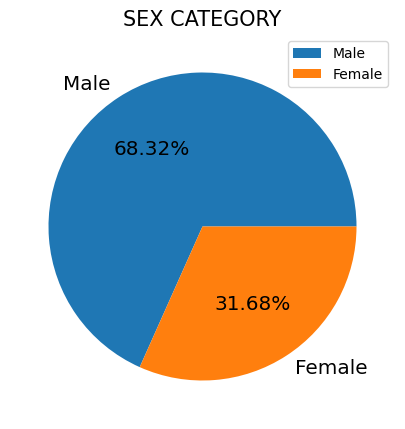

In [186]:
plt.figure(figsize=(10,5))
labels=['Male','Female']
plt.pie(pd.value_counts(df.sex),labels=labels,autopct='%.2f%%',textprops={'size':'x-large'})
plt.title('SEX CATEGORY',fontsize=15)
plt.legend()
plt.show()

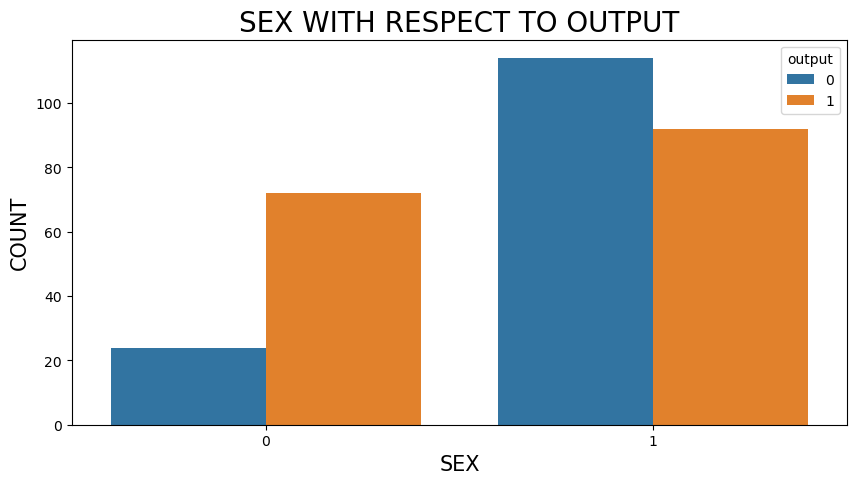

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='sex',hue='output',data=df)
plt.title('SEX WITH RESPECT TO OUTPUT',fontsize=20)
plt.xlabel('SEX',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.show()

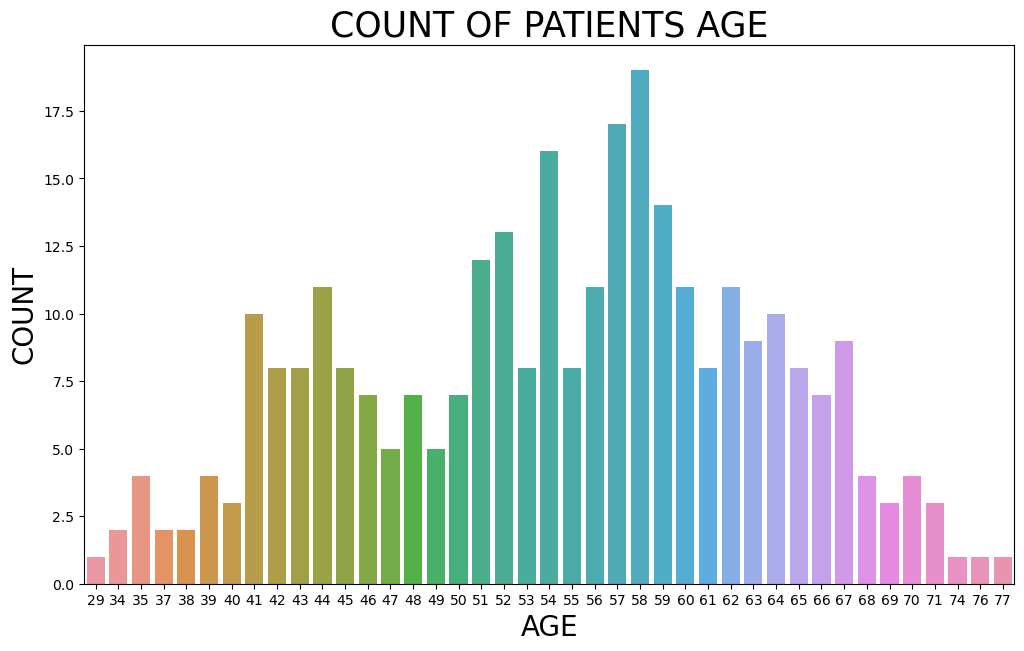

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(x='age',data=df)
plt.title('COUNT OF PATIENTS AGE',fontsize=25)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()

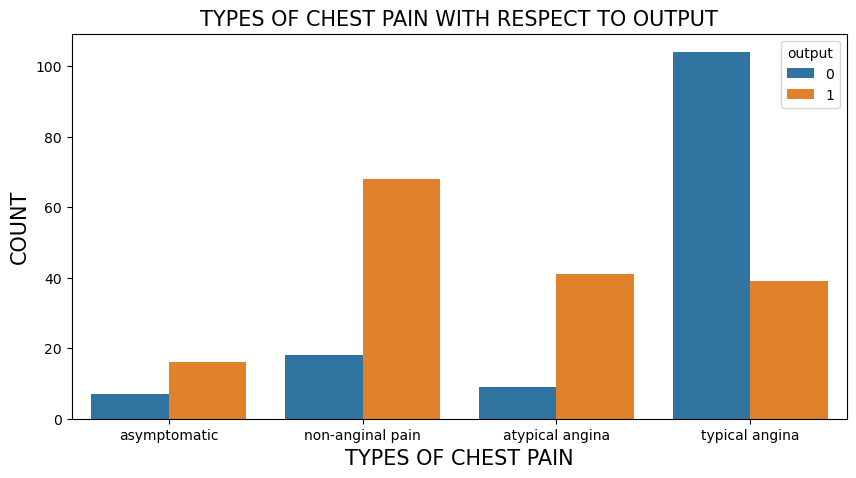

In [22]:
plt.figure(figsize=(10,5))
chest_pain=df.cp.map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
sns.countplot(x=chest_pain,hue='output',data=df)
plt.xlabel('TYPES OF CHEST PAIN',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('TYPES OF CHEST PAIN WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()

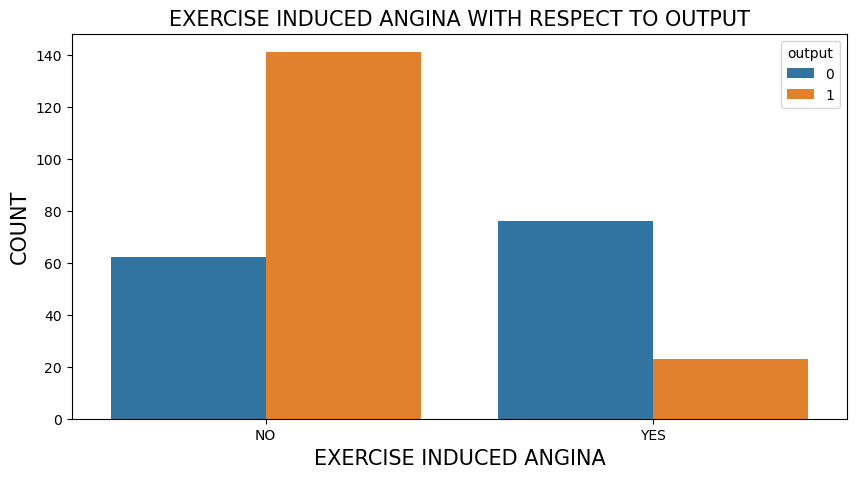

In [23]:
plt.figure(figsize=(10,5))
exng_data=df.exng.map({0:'NO',1:'YES'})
sns.countplot(x=exng_data,hue='output',data=df)
plt.xlabel('EXERCISE INDUCED ANGINA',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('EXERCISE INDUCED ANGINA WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()

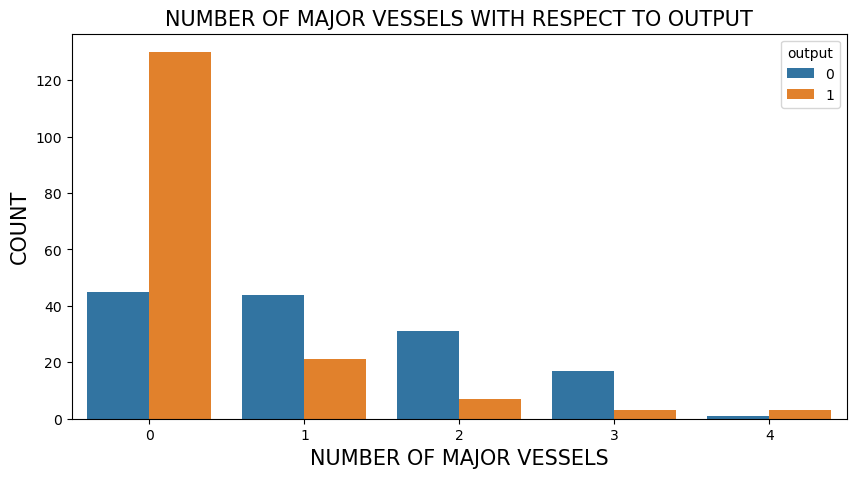

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x='caa',hue='output',data=df)
plt.xlabel('NUMBER OF MAJOR VESSELS',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('NUMBER OF MAJOR VESSELS WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()

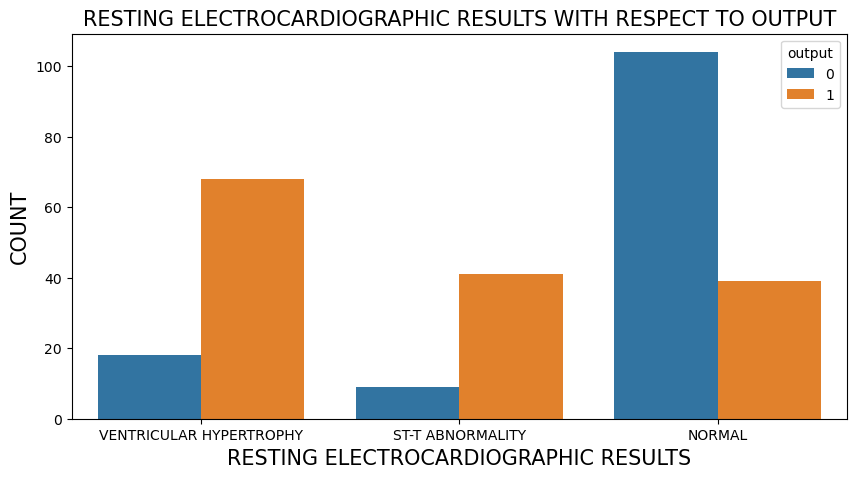

In [25]:
plt.figure(figsize=(10,5))
rest_ecg_data=df.cp.map({0:'NORMAL',1:'ST-T ABNORMALITY',2:'VENTRICULAR HYPERTROPHY'})
sns.countplot(x=rest_ecg_data,hue='output',data=df)
plt.xlabel('RESTING ELECTROCARDIOGRAPHIC RESULTS',fontsize=15)
plt.ylabel('COUNT',fontsize=15)
plt.title('RESTING ELECTROCARDIOGRAPHIC RESULTS WITH RESPECT TO OUTPUT',fontsize=15)
plt.show()

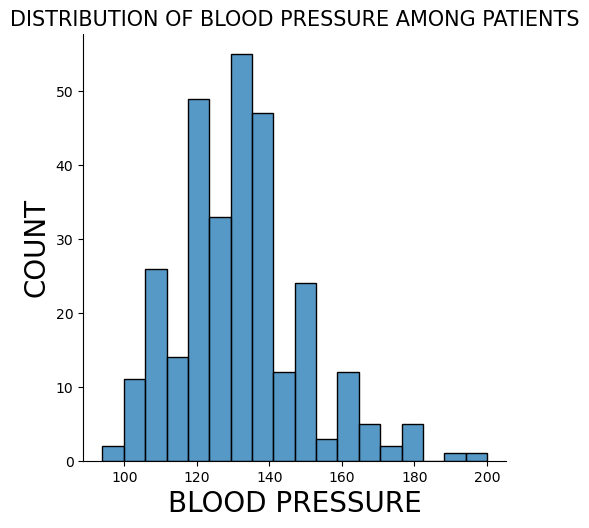

In [34]:
sns.displot(x='trtbps',data=df)
plt.title('DISTRIBUTION OF BLOOD PRESSURE AMONG PATIENTS',fontsize=15)
plt.xlabel('BLOOD PRESSURE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()

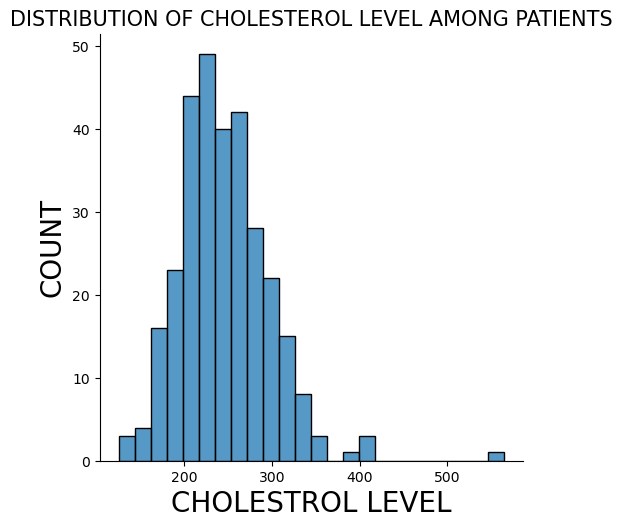

In [36]:
sns.displot(x='chol',data=df)
plt.title('DISTRIBUTION OF CHOLESTEROL LEVEL AMONG PATIENTS',fontsize=15)
plt.xlabel('CHOLESTROL LEVEL',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()

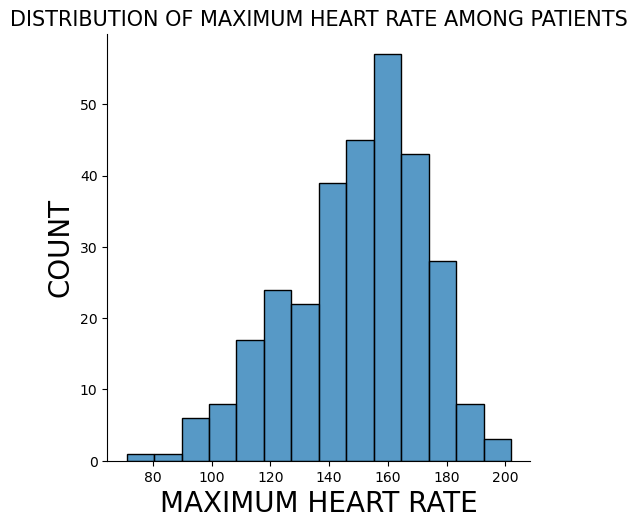

In [37]:
sns.displot(x='thalachh',data=df)
plt.title('DISTRIBUTION OF MAXIMUM HEART RATE AMONG PATIENTS',fontsize=15)
plt.xlabel('MAXIMUM HEART RATE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.show()

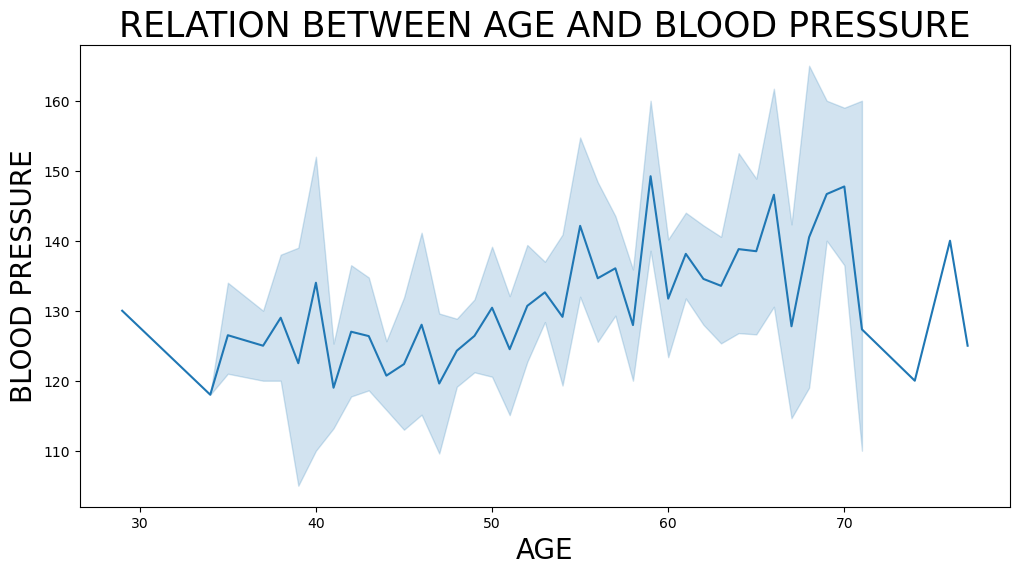

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(x='age',y='trtbps',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('BLOOD PRESSURE',fontsize=20)
plt.title('RELATION BETWEEN AGE AND BLOOD PRESSURE',fontsize=25)
plt.show()

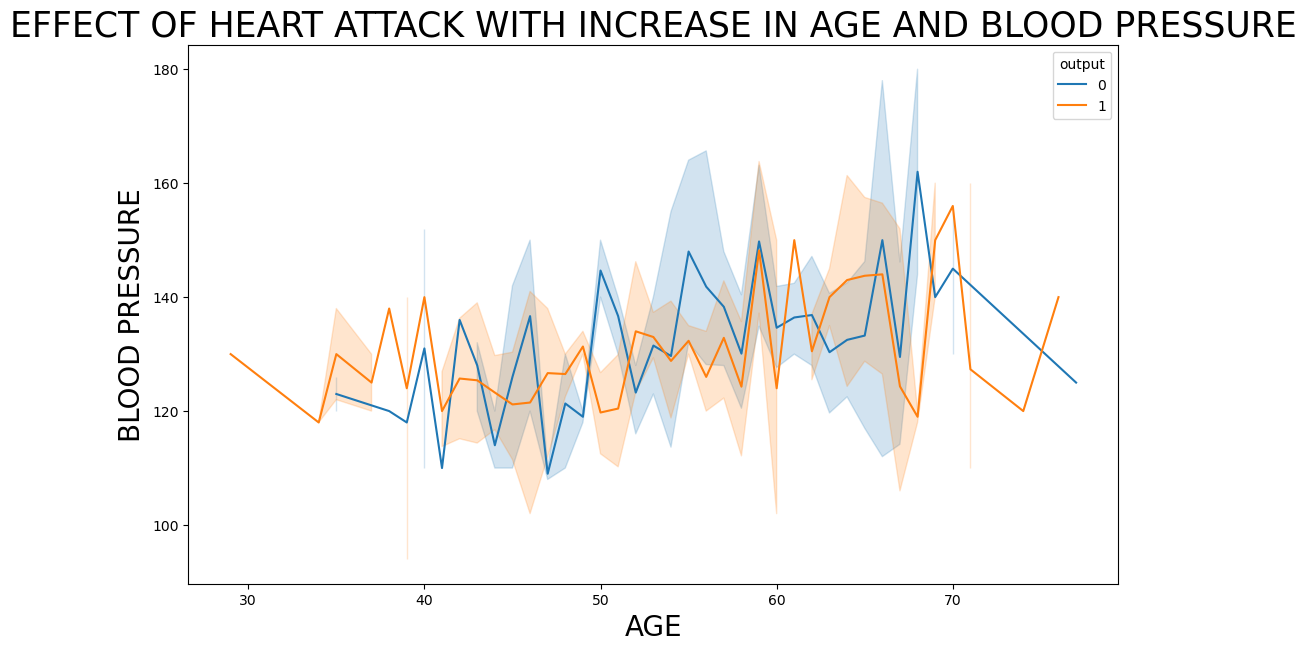

In [30]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='trtbps',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('BLOOD PRESSURE',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND BLOOD PRESSURE',fontsize=25)
plt.show()

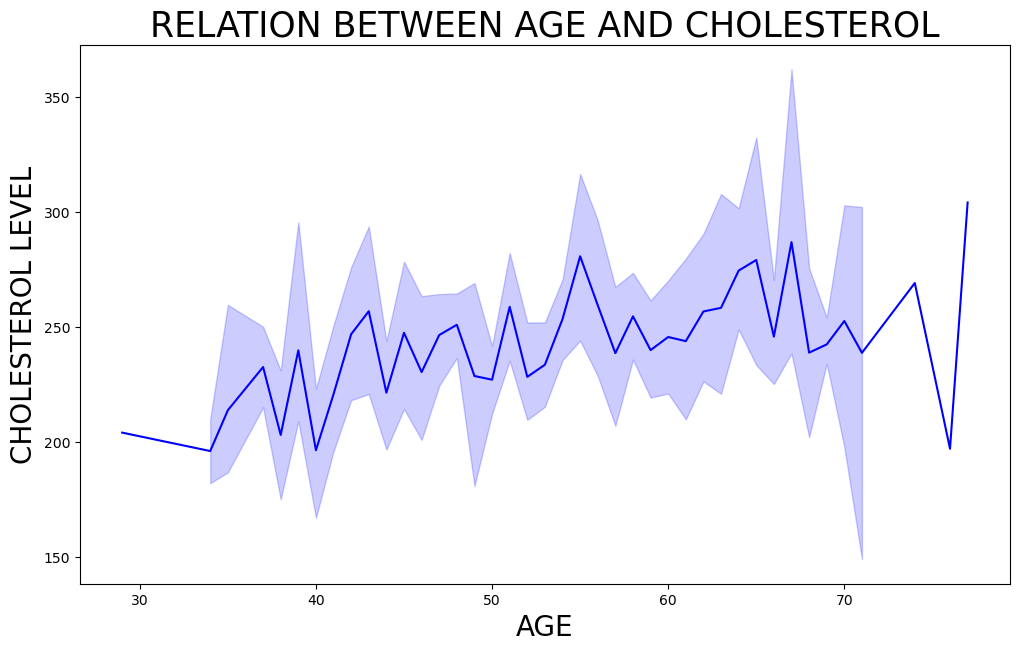

In [32]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='chol',color='blue',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('CHOLESTEROL LEVEL',fontsize=20)
plt.title('RELATION BETWEEN AGE AND CHOLESTEROL',fontsize=25)
plt.show()

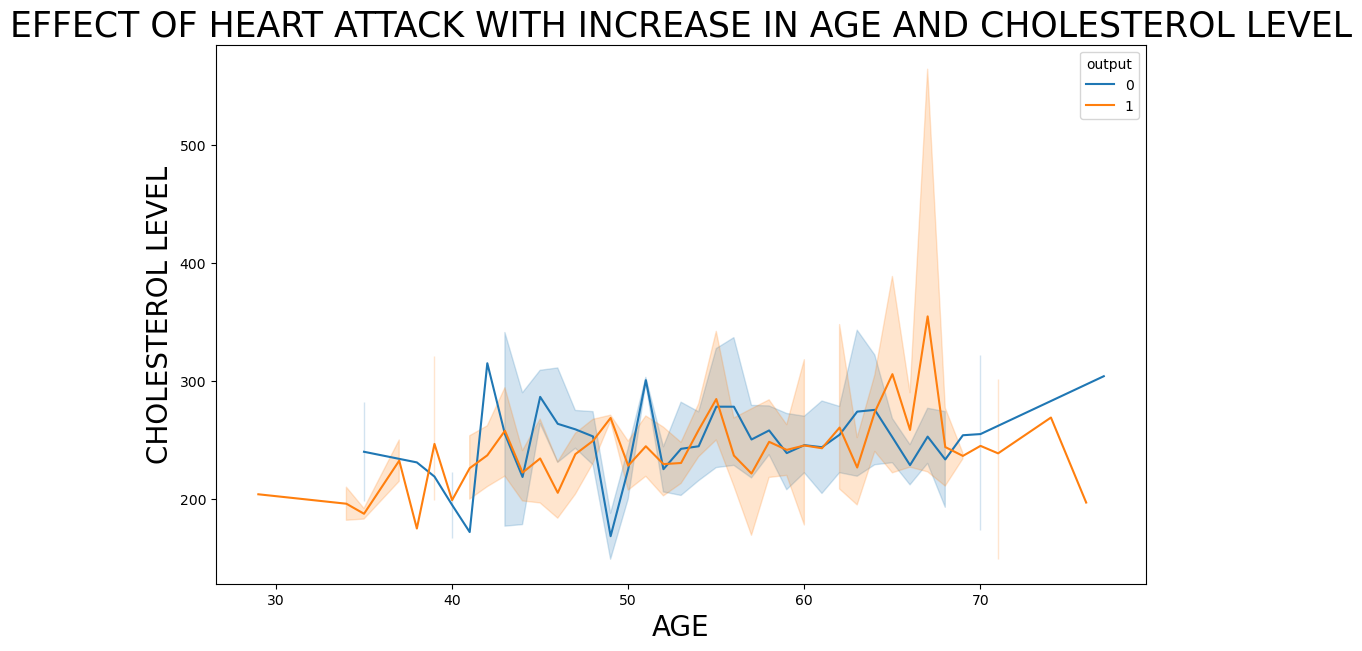

In [33]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='chol',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('CHOLESTEROL LEVEL',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND CHOLESTEROL LEVEL',fontsize=25)
plt.show()

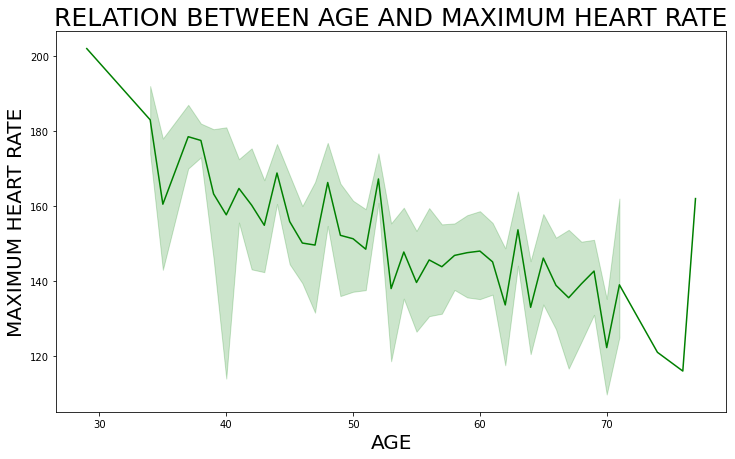

In [31]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='thalachh',color='green',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('MAXIMUM HEART RATE',fontsize=20)
plt.title('RELATION BETWEEN AGE AND MAXIMUM HEART RATE',fontsize=25)
plt.show()

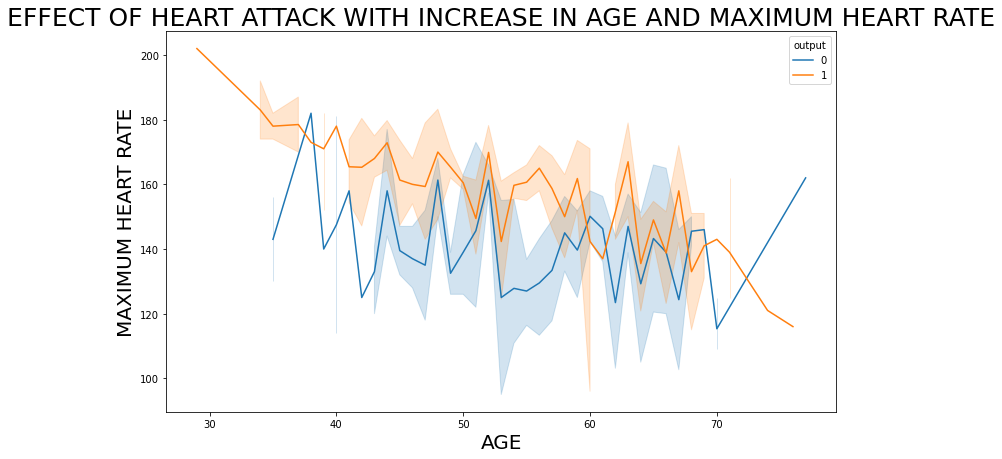

In [32]:
plt.figure(figsize=(12,7))
sns.lineplot(x='age',y='thalachh',hue='output',data=df)
plt.xlabel('AGE',fontsize=20)
plt.ylabel('MAXIMUM HEART RATE',fontsize=20)
plt.title('EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE',fontsize=25)
plt.show()

In [33]:
no= df[df['output']==0]['age'].value_counts().sort_index(ascending=True)
yes= df[df['output']==1]['age'].value_counts().sort_index(ascending=True)

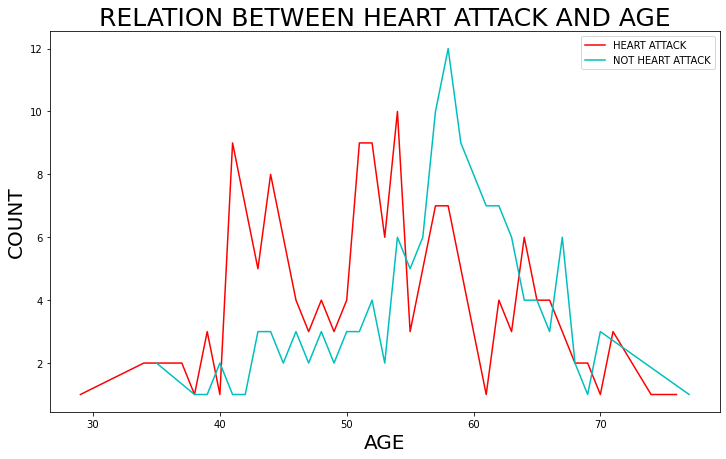

In [34]:
plt.figure(figsize=(12,7))
plt.plot(yes,c='r',label='HEART ATTACK')
plt.plot(no,c='c',label='NOT HEART ATTACK')
plt.xlabel('AGE',fontsize=20)
plt.ylabel('COUNT',fontsize=20)
plt.title('RELATION BETWEEN HEART ATTACK AND AGE',fontsize=25)
plt.legend()
plt.show()

# Data Preprocessing

In [125]:
df= pd.read_csv(r"E:\Adv Analytics\Datasets\heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<b>Let us split our data

In [126]:
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

<b>Scaling it

In [127]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit_transform(X)

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

<b>Spliting Data into Training and Testing Set

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## We can insert this data into our ML Models

### We will use the following models for our predictions :
- Logistic Regression
- Decision Tree
- Random Forest
- K Nearest Neighbour
- SVM

<b>1. LOGISTIC REGRESSION

In [129]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(X_train,y_train)


C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
y_pred = logreg.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [157]:
lr_conf_matrx = confusion_matrix(y_test,y_pred)
lr_acc_score = accuracy_score(y_test,y_pred)

In [158]:
lr_conf_matrx

array([[35,  9],
       [ 2, 45]], dtype=int64)

In [159]:
print(lr_acc_score*100,'%')

87.91208791208791 %


<b>2. DECISION TREE

In [135]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)


DecisionTreeClassifier()

In [136]:
y_pred2 = tree.predict(X_test)


In [137]:
tree_conf_matrix = confusion_matrix(y_test,y_pred2 )
tree_acc_score = accuracy_score(y_test, y_pred2)

In [138]:
tree_conf_matrix

array([[28, 16],
       [ 3, 44]], dtype=int64)

In [139]:
print(tree_acc_score*100,'%')

79.12087912087912 %


<b>3. RANDOM FOREST 

In [140]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [141]:
y_pred3=rf.predict(X_test)

In [142]:
rf_conf_matrix = confusion_matrix(y_test,y_pred3 )
rf_acc_score = accuracy_score(y_test, y_pred3)

In [143]:
rf_conf_matrix

array([[34, 10],
       [ 7, 40]], dtype=int64)

In [144]:
print(rf_acc_score*100,'%')

81.31868131868131 %


<b>4. K Nearest Neighbour

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=12)

In [146]:
y_pred4= knn.predict(X_test)

In [147]:
knn_conf_matrix = confusion_matrix(y_test,y_pred4 )
knn_acc_score = accuracy_score(y_test, y_pred4)

In [148]:
knn_conf_matrix

array([[28, 16],
       [15, 32]], dtype=int64)

In [149]:
print(knn_acc_score*100,'%')

65.93406593406593 %


<B>5. Support Vector Machine(SVM)

In [151]:
from sklearn import svm
svm= svm.SVC()
svm.fit(X_train,y_train)


SVC()

In [152]:
y_pred5= svm.predict(X_test)

In [153]:
svm_conf_matrix = confusion_matrix(y_test,y_pred5)
svm_acc_score = accuracy_score(y_test, y_pred5)

In [154]:
svm_conf_matrix

array([[20, 24],
       [ 6, 41]], dtype=int64)

In [155]:
print(svm_acc_score*100,'%')

67.03296703296702 %


### Comparing Different Model Accuracy in Tabular form

In [160]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],
                         'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

In [161]:
model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)

In [162]:
model_acc

,Model,Accuracy
0,Logistic Regression,87.912088
2,Random Forest,81.318681
1,Decision Tree,79.120879
4,SVM,67.032967
3,K Nearest Neighbor,65.934066


## Final Verdict

### After comparing all the models the best performing model is :
### Logistic Regression with no Hyperparameter tuning

In [173]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)


C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [167]:
lr_conf_matrx 


array([[35,  9],
       [ 2, 45]], dtype=int64)

In [171]:
print(lr_acc_score*100,'%')

87.91208791208791 %


In [177]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy score: ',accuracy_score(y_test,y_pred)*100,'%')
print('Precision score: ',precision_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('F1 score: ',f1_score(y_test,y_pred))

Accuracy score:  87.91208791208791 %
Precision score:  0.8333333333333334
Recall score:  0.9574468085106383
F1 score:  0.8910891089108911


### Let us build a proper confusion matrix for our model

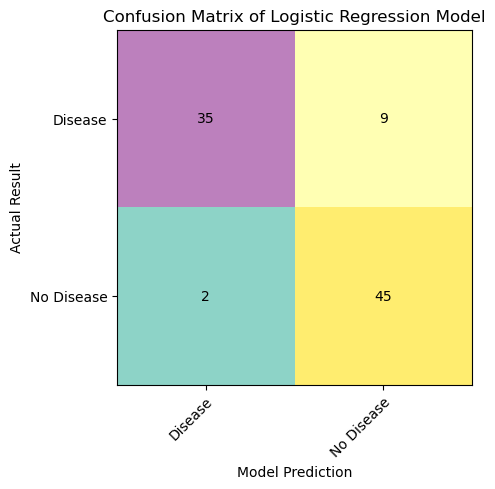

ACCURACY of our model is  87.91208791208791 %


In [182]:
# Confusion Matrix of  Model enlarged
options = ["Disease", 'No Disease']

fig, ax = plt.subplots()
im = ax.imshow(lr_conf_matrx, cmap= 'Set3', interpolation='nearest')

# We want to show all ticks...
ax.set_xticks(np.arange(len(options)))
ax.set_yticks(np.arange(len(options)))
# ... and label them with the respective list entries
ax.set_xticklabels(options)
ax.set_yticklabels(options)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(options)):
    for j in range(len(options)):
        text = ax.text(j, i, lr_conf_matrx[i, j],
                       ha="center", va="center", color="black")

ax.set_title("Confusion Matrix of Logistic Regression Model")
fig.tight_layout()
plt.xlabel('Model Prediction')
plt.ylabel('Actual Result')
plt.show()
print("ACCURACY of our model is ",lr_acc_score*100,"%")